<a href="https://colab.research.google.com/github/Rohianon/FeatureScalingTechniques/blob/master/FeatureScalingTechniques.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, MaxAbsScaler
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter('ignore')

plt.style.use('ggplot')
plt.rcParams['figure.figsize']= (13,8)
np.set_printoptions(suppress=True)
pd.set_option("display.precision", 5)

# Some helper functions

In [ ]:
def plotDistributionGraph(pdf):
    fig, a = plt.subplots(ncols=1,figsize=(16,5))
    a.set_title("Distributions")
    for col in pdf.columns:
        sns.kdeplot(pdf[col],ax=a)
    plt.show()

def plotGraph(pdf, pscaled_df):
    fig, (a, b) = plt.subplots(ncols=2, figsize=(16,5))
    a.set_title('Before Scaling')
    for col in pdf.columns:
        sns.kdeplot(pdf[col],ax=a)
    b.set_title('After scaling')
    for col in pdf.columns:
        sns.kdeplot(pscaled_df[col], ax=b)
    plt.show()

def plotAllGraphs(pdf, pscaled1, pscaled2, pscaled3):
    fif, (a, b, c, d) = plt.subplots(nrows=1,ncols=4, figsize=(16,5))
    a.set_title("Before Scaling")
    for col in pdf.columns:
        sns.kdeplot(pdf[col],ax=a)
    b.set_title("RobustScaler")
    for col in pdf.columns:
        sns.kdeplot(pscaled1[col],ax=b)
    c.set_title("MinMaxScaler")
    for col in pdf.columns:
        sns.kdeplot(pscaled2[col],ax=c)
    d.set_title("StandardScaler")
    for col in pdf.columns:
        sns.kdeplot(pscaled3[col],ax=d)
    plt.show()

# create a dataframe

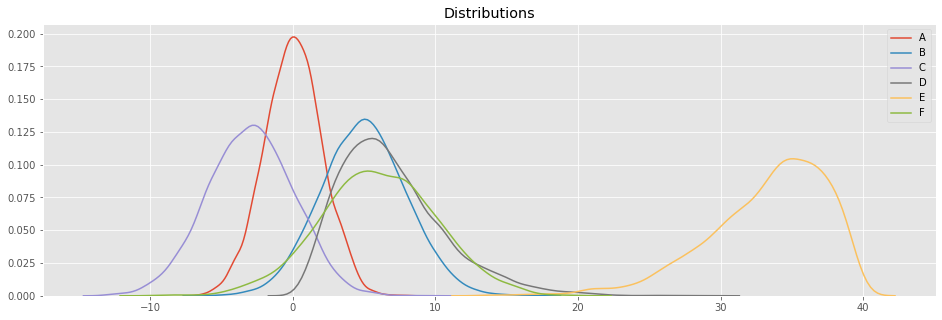

In [ ]:
np.random.seed(1)
n_rows = 5000
df = pd.DataFrame({
    "A":np.random.normal(0,2, n_rows),
    "B":np.random.normal(5,3, n_rows),
    "C":np.random.normal(-3,3, n_rows),
    "D":np.random.chisquare(7, n_rows),
    "E":np.random.beta(10,2, n_rows)*40,
    "F":np.random.normal(6,4, n_rows),
})

plotDistributionGraph(df)

# Standard Scaler

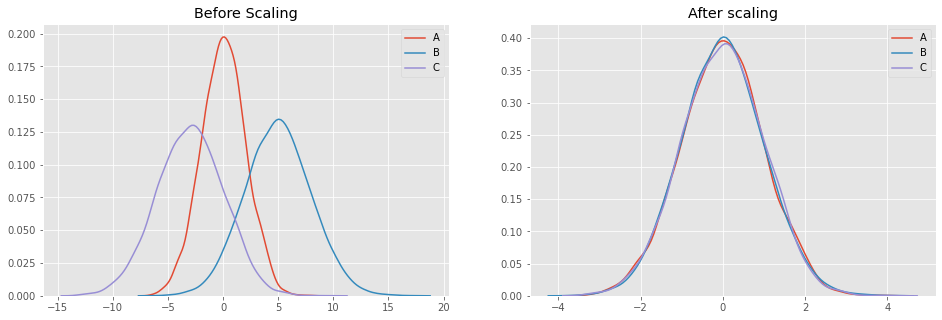

In [ ]:
scaler = StandardScaler()
keepCols = ['A','B','C']
scaled_df = scaler.fit_transform(df[keepCols])
scaled_df = pd.DataFrame(scaled_df, columns=keepCols)
plotGraph(df[keepCols],scaled_df)

# MinMaxScaler

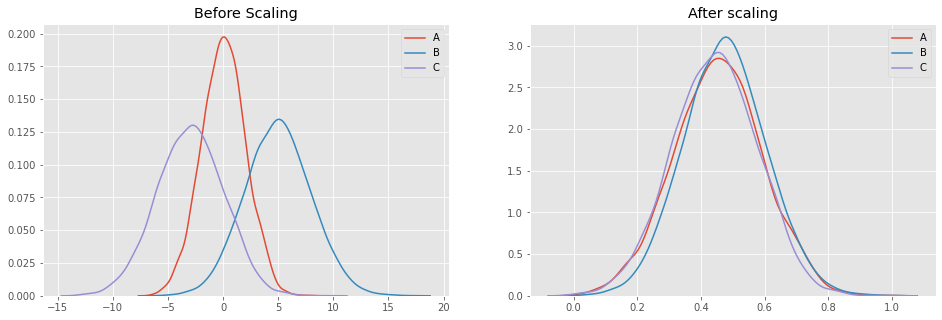

In [ ]:
scaler = MinMaxScaler()
keepCols = ['A','B','C']
scaled_df = scaler.fit_transform(df[keepCols])
scaled_df = pd.DataFrame(scaled_df, columns=keepCols)
plotGraph(df[keepCols],scaled_df)

# MaxAbsScaler

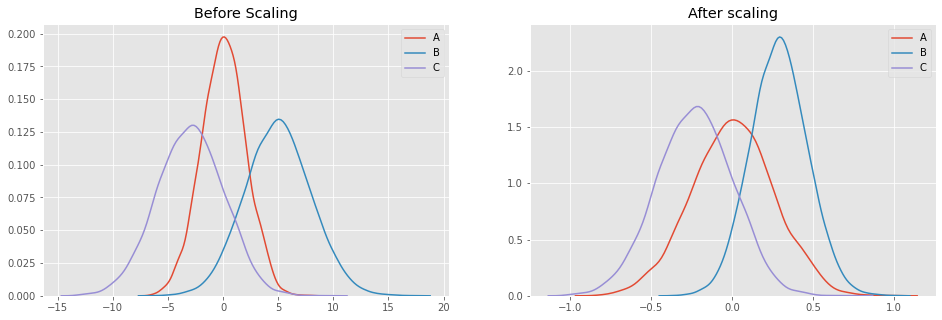

In [ ]:
scaler = MaxAbsScaler()
keepCols = ['A','B','C']
scaled_df = scaler.fit_transform(df[keepCols])
scaled_df = pd.DataFrame(scaled_df, columns=keepCols)
plotGraph(df[keepCols],scaled_df)

# RobustScaler

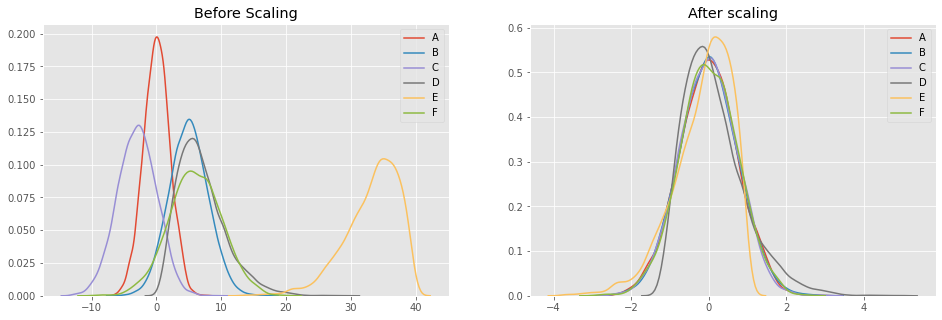

In [ ]:
scaler = RobustScaler()
keepCols = ['A','B','C','D','E','F']
scaled_df = scaler.fit_transform(df[keepCols])
scaled_df = pd.DataFrame(scaled_df, columns=keepCols)
plotGraph(df[keepCols],scaled_df)

# Comparisons

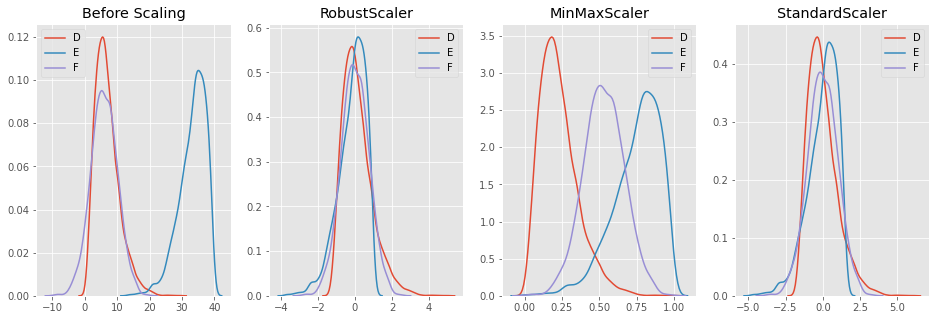

In [ ]:
scaler1 = RobustScaler()
scaler2 = MinMaxScaler()
scaler3 = StandardScaler()

keepcols = ['D','E','F']
dfscaler1 = scaler1.fit_transform(df[keepcols])
dfscaler1 = pd.DataFrame(dfscaler1,columns=keepcols)

dfscaler2 = scaler2.fit_transform(df[keepcols])
dfscaler2 = pd.DataFrame(dfscaler2,columns=keepcols)

dfscaler3 = scaler3.fit_transform(df[keepcols])
dfscaler3 = pd.DataFrame(dfscaler3,columns=keepcols)

plotAllGraphs(df[keepcols], dfscaler1, dfscaler2, dfscaler3)



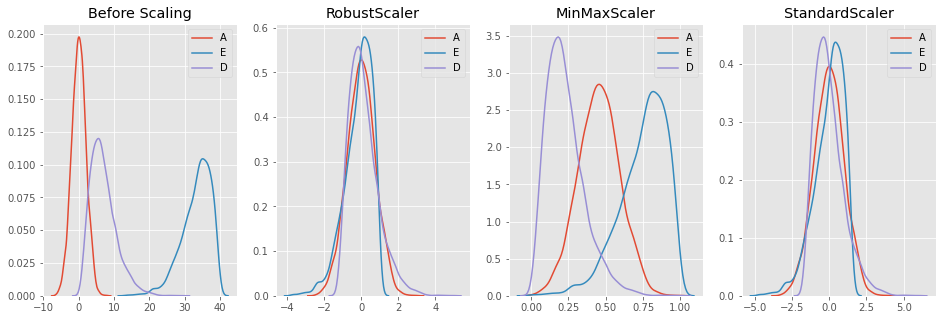

In [ ]:
scaler1 = RobustScaler()
scaler2 = MinMaxScaler()
scaler3 = StandardScaler()

keepcols = ['A','E','D']
dfscaler1 = scaler1.fit_transform(df[keepcols])
dfscaler1 = pd.DataFrame(dfscaler1,columns=keepcols)

dfscaler2 = scaler2.fit_transform(df[keepcols])
dfscaler2 = pd.DataFrame(dfscaler2,columns=keepcols)

dfscaler3 = scaler3.fit_transform(df[keepcols])
dfscaler3 = pd.DataFrame(dfscaler3,columns=keepcols)

plotAllGraphs(df[keepcols], dfscaler1, dfscaler2, dfscaler3)

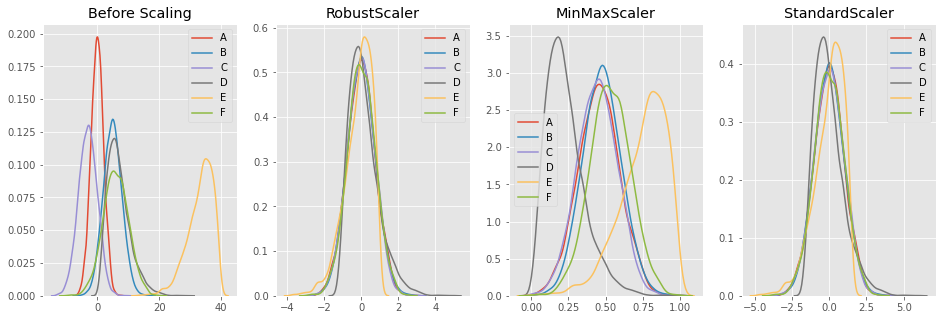

In [ ]:
scaler1 = RobustScaler()
scaler2 = MinMaxScaler()
scaler3 = StandardScaler()

keepcols = list(df.columns)
dfscaler1 = scaler1.fit_transform(df[keepcols])
dfscaler1 = pd.DataFrame(dfscaler1,columns=keepcols)

dfscaler2 = scaler2.fit_transform(df[keepcols])
dfscaler2 = pd.DataFrame(dfscaler2,columns=keepcols)

dfscaler3 = scaler3.fit_transform(df[keepcols])
dfscaler3 = pd.DataFrame(dfscaler3,columns=keepcols)

plotAllGraphs(df[keepcols], dfscaler1, dfscaler2, dfscaler3)